import packages

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 

# load the data


In [23]:
datapath = "datasets/lifesat/"

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

oecd_bli["Life satisfaction"].head()





gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter = '\t', 
                             encoding = 'latin1', na_values="n/a")

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
print( gdp_per_capita.head(2) )

gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.head(2)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
# full_country_stats



#remove_indices = [0, 1, 6, 8, 33, 34, 35]
#keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']] #.iloc[keep_indices]

                                            Subject Descriptor         Units  \
Country                                                                        
Afghanistan  Gross domestic product per capita, current prices  U.S. dollars   
Albania      Gross domestic product per capita, current prices  U.S. dollars   

             Scale                      Country/Series-specific Notes  \
Country                                                                 
Afghanistan  Units  See notes for:  Gross domestic product, curren...   
Albania      Units  See notes for:  Gross domestic product, curren...   

             GDP per capita  Estimates Start After  
Country                                             
Afghanistan         599.994                 2013.0  
Albania            3995.383                 2010.0  


# Prepare the sample data 


In [24]:
# define prepare_country_stats() function

backup = oecd_bli, gdp_per_capita


def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [25]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

# specific x and y
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


# plot country stats

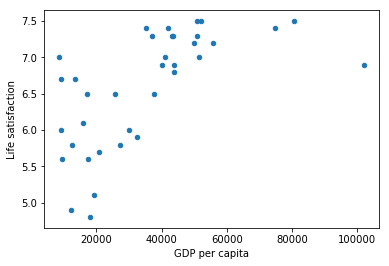

In [26]:
country_stats.plot(kind = 'scatter', x="GDP per capita", y = 'Life satisfaction')
plt.show()

In [27]:
#model3 = sklearn.linear_model.linearRegression()
#model3.fit(x, y)

# from sklearn import *
import sklearn as sk
model =  sk.linear_model.LinearRegression()

In [28]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
X = [[22587]] # Cyprus' GDP per capita
print(model.predict(X)) 

[[ 6.28653637]]
